In [1]:
import spacy
import numpy as np
import pandas as pd
import altair as alt

def cos_sim(t1, t2):
    return np.dot(t1.vector, t2.vector) / (t1.vector_norm * t2.vector_norm)

nlp = spacy.load("en_core_web_lg")

## need to reshape like gather: https://blog.zenggyu.com/en/post/2019-01-02/switching-between-tidyverse-and-pandas-for-tabular-data-wrangling-tidying-data/
##source.melt(var_name=["X","Y"], value_name = "Z")

# alt.Chart(source).mark_rect().encode(
#     x='x:O',
#     y='y:O',
#     color='z:Q'
# )

In [2]:
alt.renderers.enable('default')
text1="Last month, the government put Wuhan in a virtual lockdown, sealing off the city and banning most public transportation and private cars from its streets in a desperate effort to contain the outbreak. Now, many residents say it is nearly impossible to get the health care they need to treat — or even diagnose — the coronavirus. Expressing exasperation, doctors say there is a shortage of testing kits and other medical supplies, and it is not clear why more are not available. The ban on transportation means some residents have to walk for hours to get to hospitals — if they are well enough to make the journey. Layers of bureaucracy stand between residents and help. And the long lines outside hospitals for testing and treatment suggest that the outbreak is spreading far beyond the official count of cases."
text2="Those who do make it to the hospital say they are squeezed together for hours in waiting rooms, where infections are easily spread. But the shortages have meant that many are ultimately turned away and sent home to self-quarantine, potentially compounding the outbreak by exposing their families. Many doctors and residents are putting their hopes on the two new coronavirus hospitals that China has been racing to build in Wuhan in just a matter of days. One of them spans about eight acres, has 1,000 beds and is scheduled to open on Monday. The government says 1,400 military medical workers will be deployed to work there, potentially helping with the shortage of health professionals on hand to combat the outbreak."
def get_sentence_similarity(text1, text2):

    alt.renderers.enable('default')
    doc1 = nlp(text1)
    doc2 = nlp(text2)

    # http://akuederle.com/create-numpy-array-with-for-loop
    sent_sims = np.empty((len(list(doc1.sents)), len(list(doc2.sents))))

    sents1_dict = {i: sent.text for i, sent in enumerate(doc1.sents)}
    sents2_dict = {i: sent.text for i, sent in enumerate(doc2.sents)}
    for i, sent1 in enumerate(doc1.sents):
        for j, sent2 in enumerate(doc2.sents):
            sent_sims[i,j] = cos_sim(sent1,sent2)

    source = pd.DataFrame(sent_sims)

    df = pd.DataFrame(source.stack(), columns=['similarity']).reset_index()

    c = alt.Chart(df).mark_rect().encode(
        x='level_1:O',
        y='level_0:O',
        color='similarity:Q'
    )
    
    return c

get_sentence_similarity(text1, text2)

# print(d1_df)
# print(d2_df)
# print(source)

alt.Chart(...)

In [3]:
sent1= "Last month, the government put Wuhan in a virtual lockdown, sealing off the city and banning most public transportation and private cars from its streets in a desperate effort to contain the outbreak."
sent2= "One of them spans about eight acres, has 1,000 beds and is scheduled to open on Monday."



In [4]:
sent1= "Last month, the government put Wuhan in a virtual lockdown, sealing off the city and banning most public transportation and private cars from its streets in a desperate effort to contain the outbreak."
sent2= "One of them spans about eight acres, has 1,000 beds and is scheduled to open on Monday."

s1 = nlp(sent1)
s2 = nlp(sent2)

s1_words = [i.text for i in s1 if i.pos_ in ['NOUN']]
s2_words = [i.text for i in s2 if i.pos_ in ['NOUN']]

word_sims = np.empty((len(list(s1)), len(list(s2))))

for i, word1 in enumerate(s1):
    for j, word2 in enumerate(s2):
        word_sims[i,j] = cos_sim(word1,word2)
        
source = pd.DataFrame(word_sims)

df = pd.DataFrame(source.stack(), columns=['similarity']).reset_index()

c = alt.Chart(df).mark_rect().encode(
        x='level_1:O',
        y='level_0:O',
        color='similarity:Q'
)
print(s1_words)
print(s2_words)
c

['month', 'government', 'lockdown', 'city', 'transportation', 'cars', 'streets', 'effort', 'outbreak']
['acres', 'beds']


alt.Chart(...)

In [51]:

#pd.DataFrame({i: sent.text for i, sent in enumerate(doc2.sents)})

,Sentences
0,Anchoring effect is the tendency to focus too ...
1,"In this paper, we present a novel, systematic ..."
2,Visual analytics interfaces typically contain ...
3,"These views are designed to present complex, h..."
4,"However, human decision-making is often hinder..."
5,Anchoring effect can be triggered by the order...
6,Through carefully designed laboratory experime...
7,We also describe detailed analyses of users' i...
8,We discuss implications for future research to...


In [7]:

import pandas as pd

df = pd.read_csv("data/vispapers-umap-updated.csv")
df.head()

,Unnamed: 0,Title,Authors,Conference,Year,Abstract,Keywords,X,Y
0,0,Simulated bidirectional texture functions with...,"['Mohamed Yessine Yengui', 'Pierre Poulin']",Graphics Interface,2013,The representation of material appearance requ...,"['Artificial intelligence', 'Shape modeling', ...",8.076239,-1.644680
1,1,Isoparametric finite element analysis for Doo-...,"['Engin Dikici', 'Sten Roar Snare', 'Fredrik O...",Graphics Interface,2012,We introduce an isoparametric finite element a...,"['Mathematics of computing', 'Shape modeling',...",10.977477,-2.439908
2,2,CheatSheet: a contextual interactive memory ai...,"['Laton Vermette', 'Parmit K. Chilana', 'Micha...",Graphics Interface,2015,"We present CheatSheet, a novel contextual inte...","['Human computer interaction (HCI)', 'Interact...",1.378254,0.496444
3,3,Soft shadows from extended light sources with ...,"['Jean-Fran', 'Eric Paquette', 'Pierre Poulin']",Graphics Interface,2005,This paper presents a new method of precomputi...,"['Computer graphics', 'Computing methodologies...",7.310597,-2.329902
4,4,Mid-level smoke control for 2D animation.,"['Alfred Barnat', 'Zeyang Li', 'James McCann',...",Graphics Interface,2011,In this paper we introduce the notion that art...,"['Computer graphics', 'Computing methodologies...",6.704023,0.680075


In [8]:
texts = [_ for _ in df['Abstract']]
texts[40]

'Dense 3D polygon meshes are now a pervasive product of various modelling and scanning processes that need to be subsequently processed and structured appropriately for various applications. In this paper we address the restructuring of dense polygon meshes using their segmentation based on a number of ellipsoidal regions. We present a simple segmentation algorithm where connected components of a mesh are fit to ellipsoidal surface regions. The segmentation of a mesh into a small number of ellipsoidal elements makes for a compact geometric representation and facilitates efficient geometric queries and transformations. We also contrast and compare two polygon remeshing techniques based on the ellipsoidal surfaces and the segmentation boundaries.'

In [9]:
import spacy
import textacy

In [10]:
num = 200
en = textacy.load_spacy_lang("en_core_web_lg") #, disable=("parser",)
doc = textacy.make_spacy_doc(texts[num], lang=en)
doc._.preview

'Doc(131 tokens: "Searching for patterns in graphs and visualizin...")'

In [11]:
## add in metadata

metadata = {
    "text": df.Abstract,
    "Conference": df.Conference,
    "Year": df.Year
}

for text in texts:
    doc = textacy.make_spacy_doc((text, metadata), lang=en)

In [12]:
print(doc._.preview)

Doc(114 tokens: "Over six years, we iterated on the design of a ...")


In [13]:
import textacy.vsm 

corpus = textacy.Corpus(lang=en, data=texts)
corpus.save("data/textacy_corpus.bin.gz")

word_counts = corpus.word_counts(as_strings=True)

sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:5]

[('-PRON-', 68824),
 ('use', 19460),
 ('datum', 12926),
 ('visualization', 12359),
 ('method', 12016)]

In [14]:
doc_counts = corpus.word_doc_counts(as_strings=True)

sorted(doc_counts.items(), key=lambda x: x[1], reverse=True)[:5]

[('-PRON-', 15739),
 ('use', 10833),
 ('present', 7757),
 ('paper', 6921),
 ('base', 6606)]

In [15]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(17926, 118028, 2886150)

### Get Keywords

In [16]:
import textacy.ke

min_rank = 0.03

kw = (textacy.ke.textrank(doc, normalize="lower", window_size=2, edge_weighting="binary", topn=20) for doc in corpus)

kw_dict = {}

for index, k in enumerate(kw):
    k2 = [i for i in k if i[1] > min_rank]
    kw_dict.update({index: k2})

In [17]:
kw_dict[500]

[('hard clustering approach', 0.032193032681005165),
 ('overlapping communities', 0.030062072600066964)]

In [18]:
s = set()

for keys, i in kw_dict.items():
#    print(i)
    for j in i:
        s.add(j[0])
        
len(s)

62968

In [19]:
#vectorizer.vocabulary_terms

### Vectorizer / DTM

In [20]:
from textacy.vsm import Vectorizer

tokenized_docs = (doc._.to_terms_list(entities=False, as_strings=True, normalize = "lower") for doc in corpus) #  
# do tf-idf
vectorizer = Vectorizer(norm="l2", apply_idf=True, max_df=0.95, vocabulary_terms = s) # , max_df=0.95, min_df=5, norm="l2", apply_idf=True, 
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
doc_term_matrix

<17926x62968 sparse matrix of type '<class 'numpy.float64'>'
	with 469829 stored elements in Compressed Sparse Row format>

In [21]:
vectorizer.terms_list[100:105]

['2d dense flow fields',
 '2d desktop environment',
 '2d development view',
 '2d digital images',
 '2d discrete vector field']

In [22]:
def get_col_counts(query, vectorizer, dtm):

    word_idx = vectorizer.vocabulary_terms[query]
    return doc_term_matrix[0:, word_idx]

q = "2d flow data"

get_col_counts(query = q, vectorizer = vectorizer, dtm = doc_term_matrix)

<17926x1 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

### Topic Modeling

In [23]:
import textacy.tm

model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : data   analysis   sets   data sets   large   set   patterns   data set   data analysis   approach
topic 1 : method   algorithm   methods   approach   algorithms   field   paper   efficient   points   objects
topic 2 : design   research   computer   process   people   work   analysis   systems   use   technology
topic 3 : surface   surfaces   points   meshes   geometry   local   3d   surface reconstruction   technique   modeling
topic 4 : image   images   color   scene   quality   video   colors   technique   high   display
topic 5 : rendering   volume   volume rendering   volume data   hardware   transfer function   volumes   quality   transfer functions   direct volume
topic 6 : visualization   techniques   visualizations   visualization techniques   information visualization   field   research   fields   tool   technique
topic 7 : graph   graphs   layouts   networks   graph visualization   diagrams   graph drawing   graph layout   structure   relationships
topic 8 : model  

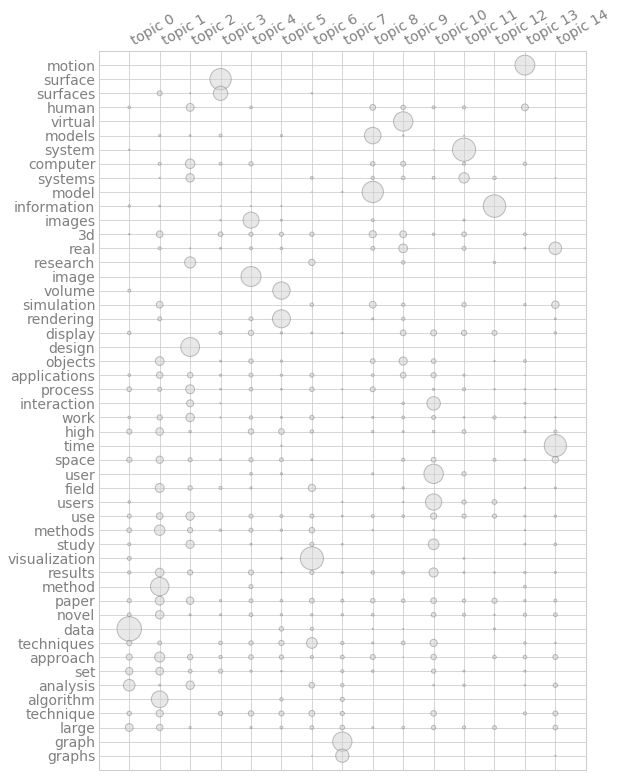

In [24]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term,
                   topics=-1,  n_terms=50, sort_terms_by="seriation")

### UMAP on NMF

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import umap
mapper = umap.UMAP().fit_transform(doc_topic_matrix)
umap_df = pd.DataFrame(mapper, columns=["X","Y"])
umap_df['color'] = df['Conference']
umap_df['title'] = df['Title']
umap_df.shape

(17926, 4)

In [27]:
import altair as alt

# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['x','y'], empty='none')

points = alt.Chart(umap_df).mark_point(filled=True, size = 10, opacity= 0.5).encode(
    x='X',
    y='Y',
    #color='black',
    fill='color:N',
    tooltip="title:N"
)


points.interactive()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [28]:
import textacy.network

d = ["Visual clutter denotes a disordered collection of graphical entities in information visualization.",
     "Clutter can obscure the structure present in the data.",
     "Even in a small dataset, clutter can make it hard for the viewer to find patterns, relationships and structure.",
     "In this paper, we define visual clutter as any aspect of the visualization that interferes with the viewer's understanding of the data, and present the concept of clutter-based dimension reordering.",
     "Dimension order is an attribute that can significantly affect a visualization's expressiveness.",
     "By varying the dimension order in a display, it is possible to reduce clutter without reducing information content or modifying the data in any way.",
     "Clutter reduction is a display-dependent task.",
     "In this paper, we follow a three-step procedure for four different visualization techniques.",
     "For each display technique, first, we determine what constitutes clutter in terms of display properties; then we design a metric to measure visual clutter in this display; finally we search for an order that minimizes the clutter in a display"]

x = textacy.network.sents_to_semantic_network(d, normalize='lemma', edge_weighting='cosine')

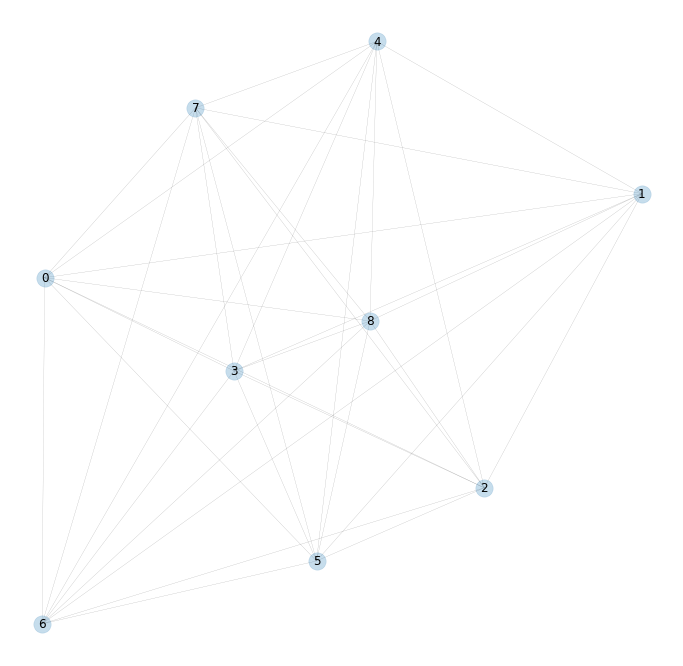

In [29]:
import textacy.viz.network

textacy.viz.network.draw_semantic_network(x, node_weights=None, 
                                          spread=1, draw_nodes=True, base_node_size=300, node_alpha=0.25, 
                                          line_width=0.2, line_alpha=0.4, base_font_size=12, save=False)

In [30]:
l = []

for docs in corpus[0:2]:
    list(textacy.extract.ngrams(docs, 3, filter_stops=True, filter_punct=True, filter_nums=False))

In [31]:
import textacy.ke
kw = textacy.ke.textrank(doc, normalize="lemma", topn=10)

kw

[('future user interface description language', 0.09253390500469769),
 ('key design choice', 0.05054131805275852),
 ('speech user interface', 0.04105496864670277),
 ('final design', 0.03944288835694963),
 ('handheld computer', 0.029320101546144395),
 ('desktop computer', 0.029200001345165406),
 ('diverse appliance', 0.027892384515171058),
 ('mobile phone', 0.022698705906634056),
 ('useful guide', 0.02184220385927852),
 ('year', 0.013186359713420292)]

In [32]:
#g = textacy.ke.utils.normalize_terms(doc, "lemma")
textacy.ke.utils.aggregate_term_variants(doc)

TypeError: argument of type 'spacy.tokens.token.Token' is not iterable

In [ ]:
textacy.ke.sgrank(doc, ngrams=(1, 2, 3, 4), normalize="lemma", topn=0.2)

In [50]:
ts = textacy.TextStats(doc)

## Prodigy

In [54]:
#import prodigy

In [10]:
#!prodigy dataset vis_papers

✔ Successfully added 'vis_papers' to database SQLite


In [11]:
#!prodigy stats


============================== ✨  Prodigy Stats ==============================

Version          1.9.3                         
Location         /Users/rhymenoceros/opt/miniconda3/envs/chissl/lib/python3.6/site-packages/prodigy/recipes
Prodigy Home     /Users/rhymenoceros/.prodigy  
Platform         Darwin-18.7.0-x86_64-i386-64bit
Python Version   3.6.9                         
Database Name    SQLite                        
Database Id      sqlite                        
Total Datasets   1                             
Total Sessions   0                             

